# Overview Notebook

This notebook contains applications of the machine model implementations. This notebook contains samples of code that were used to explore and validate the implementations.

In [4]:
import pandas as pd
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns

from data.data_reader import data_reader

# Decision Tree

In [3]:
from DecisionTree.decision_tree import entropy, majority_error, gini_index, compute_gain
from DecisionTree.decision_tree import DecisionTree
from DecisionTree.decision_tree import dtree_accuracy

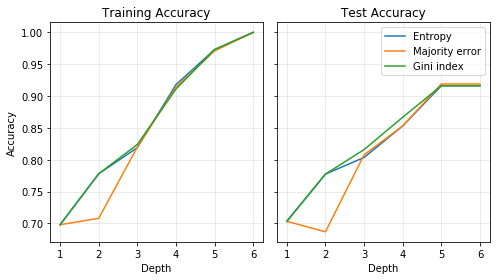

In [7]:
(X_train, y_train), (X_test, y_test), desc = data_reader(data='car')

# vary gain function, and depth [1, 6]
r_train, r_test = dtree_accuracy(X_train, y_train, 
                                   X_test, y_test, 
                                   functions=[entropy, majority_error, gini_index], 
                                   depths=np.arange(1, 7))

df_train_results = pd.DataFrame(r_train)
df_test_results = pd.DataFrame(r_test)

# plot results
fig, ax = plt.subplots(nrows=1, ncols=2, sharey=True, figsize=(7, 4))

for h in ['entropy', 'majority_error', 'gini_index']:
    ax[0].plot(df_train_results['depth'], df_train_results[h], label=h.replace('_', ' ').capitalize())
    ax[1].plot(df_test_results['depth'], df_test_results[h], label=h.replace('_', ' ').capitalize())

for i in range(2):
    ax[i].grid(alpha=0.3)
    ax[i].set_xlabel('Depth')

ax[0].set_ylabel('Accuracy')

ax[0].set_title('Training Accuracy')
ax[1].set_title('Test Accuracy')

ax[1].legend()
fig.tight_layout()

plt.show()

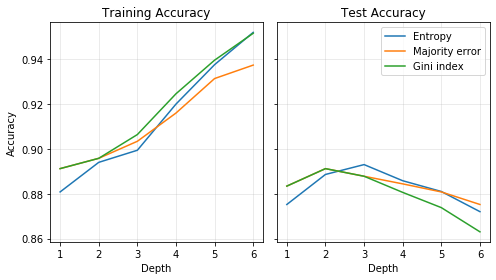

In [9]:
(X_train, y_train), (X_test, y_test), desc = data_reader(data='bank')

# vary gain function, and depth [1, 6]
r_train, r_test = dtree_accuracy(X_train, y_train, 
                                   X_test, y_test, 
                                   functions=[entropy, majority_error, gini_index], 
                                   depths=np.arange(1, 7))

df_train_results = pd.DataFrame(r_train)
df_test_results = pd.DataFrame(r_test)

# plot results
fig, ax = plt.subplots(nrows=1, ncols=2, sharey=True, figsize=(7, 4))

for h in ['entropy', 'majority_error', 'gini_index']:
    ax[0].plot(df_train_results['depth'], df_train_results[h], label=h.replace('_', ' ').capitalize())
    ax[1].plot(df_test_results['depth'], df_test_results[h], label=h.replace('_', ' ').capitalize())

for i in range(2):
    ax[i].grid(alpha=0.3)
    ax[i].set_xlabel('Depth')

ax[0].set_ylabel('Accuracy')

ax[0].set_title('Training Accuracy')
ax[1].set_title('Test Accuracy')

ax[1].legend()
fig.tight_layout()

plt.show()

# Ensemble Learning

NOTE: these cells can take a long time to run because it gets both overall predictions and predictions at each epoch.

In [31]:
from EnsembleLearning.ensemble_learning import Adaboost, Bagging, RandomForest, accuracy, get_incremental_error

## Adaboost

In [18]:
(X_train, y_train), (X_test, y_test), desc = data_reader(data='bank')

In [19]:
model = Adaboost()
model.fit(X_train, y_train, T=500)

In [20]:
y_pred, i_pred, s_pred = model.predict(X_train, store_prev=True)

i_pred[i_pred < 0]=-1
i_pred[i_pred >= 0]=1

error_train = [1 - accuracy(i, y_train) for i in i_pred]
error_train_stump = [1 - accuracy(s, y_train) for s in s_pred]

In [21]:
y_pred, i_pred, s_pred = model.predict(X_test, store_prev=True)

i_pred[i_pred < 0]=-1
i_pred[i_pred >= 0]=1

error_test = [1 - accuracy(i, y_test) for i in i_pred]
error_train_stump = [1 - accuracy(s, y_test) for s in s_pred]

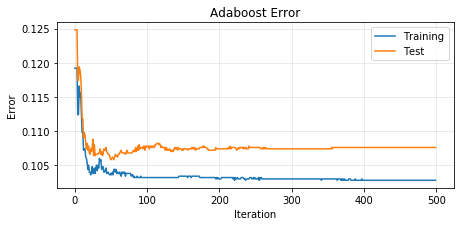

In [24]:
plt.figure(figsize=(6.5, 3.25))
plt.plot(error_train, label='Training')
plt.plot(error_test, label='Test')
plt.ylabel('Error')
plt.xlabel('Iteration')
plt.legend()
plt.grid(alpha=0.3)
plt.title('Adaboost Error')

plt.tight_layout()

plt.show()

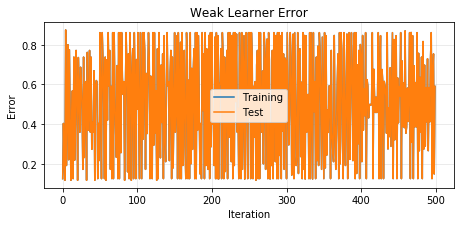

In [25]:
plt.figure(figsize=(6.5, 3.25))
plt.plot(error_train_stump, label='Training')
plt.plot(error_train_stump, label='Test')
plt.ylabel('Error')
plt.xlabel('Iteration')
plt.legend()
plt.grid(alpha=0.3)
plt.title('Weak Learner Error')

plt.tight_layout()

plt.show()

## Bagging

In [26]:
(X_train, y_train), (X_test, y_test), desc = data_reader(data='bank')

model = Bagging(num_trees=500)
model.fit(X_train, y_train, m=1000)

In [28]:
y_pred, t_pred = model.predict(X_train, individual=True)

error_train=[]
for i in range(t_pred.shape[1]):
    i+=1
    tp = t_pred[:, :i]
    tp = stats.mode(tp, axis=1)[0].reshape(-1)
    
    error_train.append(1 - accuracy(tp, y_train))

In [29]:
y_pred, t_pred = model.predict(X_test, individual=True)

error_test=[]
for i in range(t_pred.shape[1]):
    i+=1
    tp = t_pred[:, :i]
    tp = stats.mode(tp, axis=1)[0].reshape(-1)
    
    error_test.append(1 - accuracy(tp, y_test))

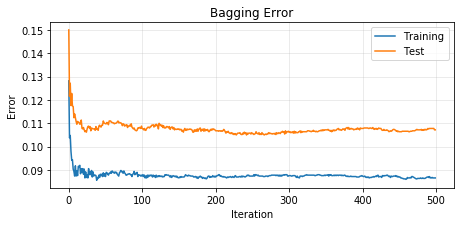

In [30]:
plt.figure(figsize=(6.5, 3.25))
plt.plot(error_train, label='Training')
plt.plot(error_test, label='Test')
plt.ylabel('Error')
plt.xlabel('Iteration')
plt.legend()
plt.grid(alpha=0.3)
plt.title('Bagging Error')

plt.tight_layout()

plt.show()

## Random Forest

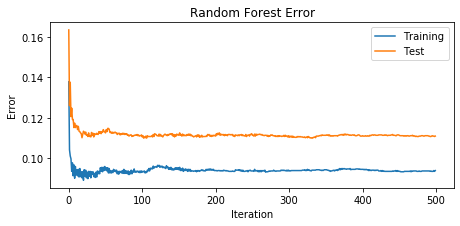

In [67]:
(X_train, y_train), (X_test, y_test), desc = data_reader(data='bank')

s=4
model = RandomForest(num_trees=500, sub_size=s)
model.fit(X_train, y_train, m=1000)

error_train = get_incremental_error(model, X_train, y_train)
error_test = get_incremental_error(model, X_test, y_test)


plt.figure(figsize=(6.5, 3.25))
plt.plot(error_train, label='Training')
plt.plot(error_test, label='Test')
plt.title('Random Forest Error')
plt.ylabel('Error')
plt.xlabel('Iteration')
plt.legend()
plt.grid(alpha=0.3)

plt.tight_layout()
plt.show()

# Linear Regression

In [32]:
from LinearModel.linear_regression import LinearRegression, mean_square_loss, optimal_weight_vector

In [34]:
(X_train, y_train), (X_test, y_test), desc = data_reader(data='concrete')

In [36]:
# get optimal weight vector
optimal_weight = optimal_weight_vector(X_train, y_train)

### Batch

In [38]:
# fit data with batch method
lr = 1e-2
model_batch = LinearRegression(tol=1e-6)
model_batch.fit(X_train, y_train, r=lr, method='batch')

print('BATCH GRADIENT DESCENT')
print(f"Learning Rate: {lr}\n")
print(f'Weights: {model_batch.W}\n')
print(f"Training cost: {model_batch.loss[-1]}")
print(f"Test cost:     {mean_square_loss(y_test, model_batch.predict(X_test))}\n")

BATCH GRADIENT DESCENT
Learning Rate: 0.01

Weights: [-0.01520362  0.90022499  0.78594341  0.85066508  1.29862298  0.12983393
  1.5717928   0.99834709]

Training cost: 14.981943701311598
Test cost:     23.361305269196603



### SGD

In [39]:
# fit data with sgd method

lr = 2e-3
model_sgd = LinearRegression(tol=1e-6)
model_sgd.fit(X_train, y_train, r=lr, method='sgd', max_iter=1e10)

print('STOCHASTIC GRADIENT DESCENT')
print(f"Learning Rate: {lr}\n")
print(f'Weights: {model_sgd.W}\n')
print(f"Training cost: {model_sgd.loss[-1]}")
print(f"Test cost:     {mean_square_loss(y_test, model_sgd.predict(X_test))}")

STOCHASTIC GRADIENT DESCENT
Learning Rate: 0.002

Weights: [-0.01123449  0.01921661 -0.15059135 -0.19966026  0.53456006 -0.05999158
  0.31982126  0.0589353 ]

Training cost: 15.441198055036276
Test cost:     22.793741646338376


### Visualize Results

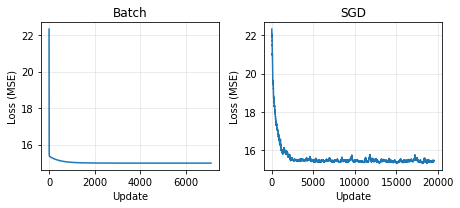

In [40]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(6.5, 3))

ax[0].plot(model_batch.loss)
ax[1].plot(model_sgd.loss)

for i, title in enumerate(['Batch', 'SGD']):
    ax[i].set_title(title)
    ax[i].set_xlabel('Update')
    ax[i].set_ylabel('Loss (MSE)')
    ax[i].grid(alpha=0.3)

fig.tight_layout()

In [41]:
print('Weight vector difference with optimal weight vector')
print(f"Batch: {np.linalg.norm((optimal_weight - model_batch.W))}")
print(f"SGD:   {np.linalg.norm((optimal_weight - model_sgd.W))}")

Weight vector difference with optimal weight vector
Batch: 0.0008862770719391832
SGD:   2.4146433914399497


# Perceptron

In [68]:
from Perceptron.perceptron import Perceptron, get_accuracy, get_error

--------------------------------------------------------------------------------------
Standard Perceptron:
test error: 0.018
weights
[ 0.56       -0.56288283 -0.3258475  -0.40006257 -0.1541149 ]

--------------------------------------------------------------------------------------
Voted Perceptron:
test error: 0.014
votes and weights:

--------------------------------------------------------------------------------------
Averaged Perceptron:
test error: 0.014
weights
[ 3397.12       -3985.61037136 -2618.70327112 -2690.6843756
  -653.89575543]


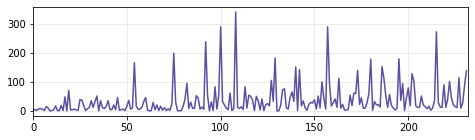

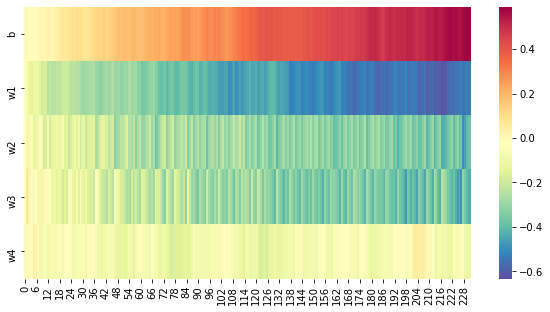


--------------------------------------------------------------------------------------
Average Training Error Over 10 Iterations
standard    0.018349
voted       0.012844
averaged    0.013417
dtype: float64

Average Test Error Over 10 Iterations
standard    0.0216
voted       0.0140
averaged    0.0140
dtype: float64


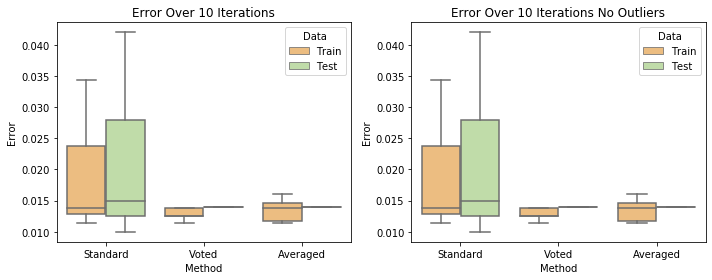

In [51]:
(X_train, y_train), (X_test, y_test), desc = data_reader(data='bank-note')

# fit perceptron for each version and print weights and test error
lr=0.01
model_stnd = Perceptron(version='standard', lr=lr)
model_vote = Perceptron(version='voted', lr=lr)
model_avrg = Perceptron(version='averaged', lr=lr)

# standard
model_stnd.fit(X_train, y_train)
print('--------------------------------------------------------------------------------------')
print('Standard Perceptron:')
print(f'test error: {get_error(model_stnd.predict(X_test), y_test)}')
print('weights')
print(model_stnd.w)

# voted
model_vote.fit(X_train, y_train)
vote_weight = pd.concat([pd.DataFrame(model_vote.c[1:], columns=['Count']), 
                         pd.DataFrame(model_vote.w[1:], columns=['b', 'w1', 'w2', 'w3', 'w4'])], axis=1)
print('\n--------------------------------------------------------------------------------------')
print('Voted Perceptron:')
print(f'test error: {get_error(model_vote.predict(X_test), y_test)}')
print('votes and weights:')
vote_weight.round(4).to_csv('table_perceptron_weights.csv', index=False)

# averaged
model_avrg.fit(X_train, y_train)
print('\n--------------------------------------------------------------------------------------')
print('Averaged Perceptron:')
print(f'test error: {get_error(model_avrg.predict(X_test), y_test)}')
print('weights')
print(model_avrg.w)

# Visualize voted perceptron votes
plt.figure(figsize=(7.8, 2))
vote_weight['Count'].plot(cmap='Spectral_r')
plt.grid(alpha=0.3)
plt.xlim(0, len(vote_weight))
plt.show()

# Visualize voted perceptron weights
plt.figure(figsize=(10, 5))
sns.heatmap(vote_weight.drop('Count', axis=1).values.T, cmap='Spectral_r', yticklabels=['b', 'w1', 'w2', 'w3', 'w4'])
plt.show()

# fit data with every version of perceptron multiple times for comparison
iterations=10
lr = 0.01
T = 10

# dictionary to store results
results_train={'standard': [], 'voted': [], 'averaged': []}
results_test={'standard': [], 'voted': [], 'averaged': []}

# loop through each version
for ver in ['standard', 'voted', 'averaged']:
    model = Perceptron(version=ver, lr=lr)
    
    # loop through each iteration
    for i in range(iterations):
        model.fit(X_train, y_train, T=T)
        y_pred_train = model.predict(X_train)
        y_pred_test = model.predict(X_test)
        
        results_train[ver].append(get_error(y_pred_train, y_train))
        results_test[ver].append(get_error(y_pred_test, y_test))
    
# format results
results_train = pd.DataFrame(results_train)
results_test = pd.DataFrame(results_test)

r_train = pd.melt(results_train)
r_train['Data'] = 'Train'

r_test = pd.melt(results_test)
r_test['Data'] = 'Test'

results = pd.concat([r_train, r_test])
results.columns=['Method', 'Error', 'Data']
results['Method'] = results['Method'].apply(lambda x: x.capitalize())

# print results
print('\n--------------------------------------------------------------------------------------')
print(f'Average Training Error Over {iterations} Iterations')
print(results_train.mean())
print(f'\nAverage Test Error Over {iterations} Iterations')
print(results_test.mean())

fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(10, 4))
sns.boxplot(data=results, x='Method', y='Error', hue='Data', palette='Spectral', showfliers=True, ax=ax[0])
sns.boxplot(data=results, x='Method', y='Error', hue='Data', palette='Spectral', showfliers=False, ax=ax[1])
ax[0].set_title(f'Error Over {iterations} Iterations')
ax[1].set_title(f'Error Over {iterations} Iterations No Outliers')
fig.tight_layout()
plt.show()

# SVM

In [69]:
from SVM.svm import SVM, SVM_Dual, get_accuracy, get_error

In [54]:
(X_train, y_train), (X_test, y_test), desc = data_reader(data='bank-note')

params_2a=[]
error_train_2a=[]
error_test_2a=[]

C = [(100/873), (500/873), (700/873)]

for Ci in C:
    # instantiate model
    model = SVM(C=Ci, gamma0=0.005, d=0.02)
    # fit to training data
    model.fit(X_train, y_train)
    
    # store weights
    params_2a.append(model.w.copy())
    
    # predict on training data
    y_pred = model.predict(X_train)
    # get training error
    error_train = get_error(y_pred, y_train)
    error_train_2a.append(error_train)
    
    # predict on test data
    y_pred = model.predict(X_test)
    # get test error
    error_test = get_error(y_pred, y_test)
    error_test_2a.append(error_test)
    
    # print results
    print(f"C = {round(Ci, 3)}, training error: {round(error_train, 4)}, test error: {round(error_test, 4)}")
    
params_2a = np.array(params_2a)
error_train_2a = np.array(error_train_2a)
error_test_2a = np.array(error_test_2a)

C = 0.115, training error: 0.0126, test error: 0.014
C = 0.573, training error: 0.0149, test error: 0.014
C = 0.802, training error: 0.0161, test error: 0.012


In [55]:
params_2b=[]
error_train_2b=[]
error_test_2b=[]

for Ci in C:
    # instantiate model
    model = SVM(C=Ci, gamma0=1e-3, d=0.1)
    # fit to training data
    model.fit(X_train, y_train)
    
    # store weights
    params_2b.append(model.w.copy())
    
    # predict on training data
    y_pred = model.predict(X_train)
    # get training error
    error_train = get_error(y_pred, y_train)
    error_train_2b.append(error_train)
    
    # predict on test data
    y_pred = model.predict(X_test)
    # get test error
    error_test = get_error(y_pred, y_test)
    error_test_2b.append(error_test)
    
    # print results
    print(f"C = {round(Ci, 3)}, training error: {round(error_train, 4)}, test error: {round(error_test, 4)}")
    
params_2b = np.array(params_2b)
error_train_2b = np.array(error_train_2b)
error_test_2b = np.array(error_test_2b)

C = 0.115, training error: 0.0103, test error: 0.014
C = 0.573, training error: 0.0092, test error: 0.01
C = 0.802, training error: 0.0608, test error: 0.074


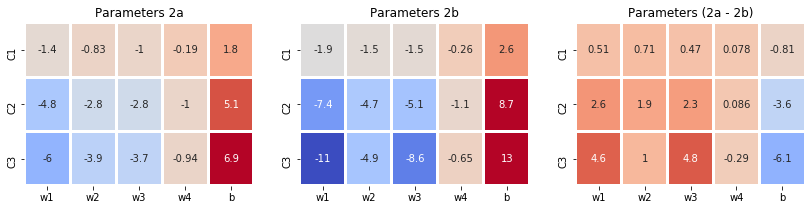

In [56]:
cmap='coolwarm'
vmin = min(params_2a.min(), params_2b.min())
vmax = min(params_2a.max(), params_2b.max())
x_lab = ['w1', 'w2', 'w3', 'w4', 'b']
y_lab = ['C1', 'C2', 'C3']
params_ab = params_2a - params_2b

fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(14, 3))
sns.heatmap(params_2a, ax=ax[0], vmin=vmin, vmax=vmax, cmap=cmap, annot=True, linecolor='white', linewidth=2, cbar=False, xticklabels=x_lab, yticklabels=y_lab)
sns.heatmap(params_2b, ax=ax[1], vmin=vmin, vmax=vmax, cmap=cmap, annot=True, linecolor='white', linewidth=2, cbar=False, xticklabels=x_lab, yticklabels=y_lab)
sns.heatmap(params_ab, ax=ax[2], vmin=vmin, vmax=vmax, cmap=cmap, annot=True, linecolor='white', linewidth=2, cbar=False, xticklabels=x_lab, yticklabels=y_lab)

ax[0].set_title('Parameters 2a')
ax[1].set_title('Parameters 2b')
ax[2].set_title('Parameters (2a - 2b)')

plt.show()

In [58]:
params_3a=[]
error_train_3a=[]
error_test_3a=[]

for Ci in C:
    # instantiate model
    model = SVM_Dual(C=Ci)
    # fit to training data
    model.fit(X_train, y_train)
    
    # store weights
    params_3a.append(model.w.copy())
    
    # predict on training data
    y_pred = model.predict(X_train)
    # get training error
    error_train = get_error(y_pred, y_train)
    error_train_3a.append(error_train)
    
    # predict on test data
    y_pred = model.predict(X_test)
    # get test error
    error_test = get_error(y_pred, y_test)
    error_test_3a.append(error_test)
    
    # print results
    print(f"C = {round(Ci, 3)}, training error: {round(error_train, 4)}, test error: {round(error_test, 4)}")
    
params_3a = np.array(params_3a)
error_train_3a = np.array(error_train_3a)
error_test_3a = np.array(error_test_3a)

Optimization Converged: True
Optimization terminated successfully.
C = 0.115, training error: 0.0115, test error: 0.012
Optimization Converged: True
Optimization terminated successfully.
C = 0.573, training error: 0.008, test error: 0.008
Optimization Converged: True
Optimization terminated successfully.
C = 0.802, training error: 0.0092, test error: 0.01


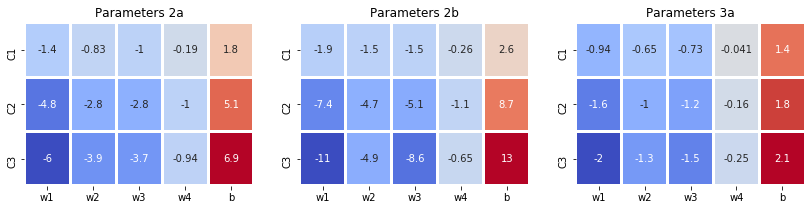

In [60]:
cmap='coolwarm'
vmin = min(params_2a.min(), params_2b.min(), params_3a.min())
vmax = min(params_2a.max(), params_2b.max(), params_3a.max())
x_lab = ['w1', 'w2', 'w3', 'w4', 'b']
y_lab = ['C1', 'C2', 'C3']

fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(14, 3))
sns.heatmap(params_2a, ax=ax[0], cmap=cmap, annot=True, linecolor='white', linewidth=2, cbar=False, xticklabels=x_lab, yticklabels=y_lab)
sns.heatmap(params_2b, ax=ax[1], cmap=cmap, annot=True, linecolor='white', linewidth=2, cbar=False, xticklabels=x_lab, yticklabels=y_lab)
sns.heatmap(params_3a, ax=ax[2], cmap=cmap, annot=True, linecolor='white', linewidth=2, cbar=False, xticklabels=x_lab, yticklabels=y_lab)

ax[0].set_title('Parameters 2a')
ax[1].set_title('Parameters 2b')
ax[2].set_title('Parameters 3a')

plt.show()

# Logistic Regression

In [70]:
from LogisticRegression.logistic_regression import LogisticRegression, get_accuracy, get_error

In [62]:
(X_train, y_train), (X_test, y_test), desc = data_reader(data='bank-note')

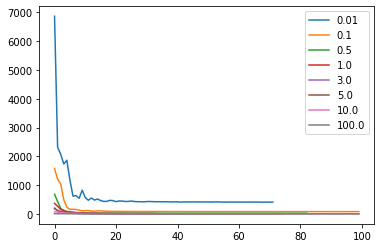

In [63]:
variance = np.array([0.01, 0.1, 0.5, 1, 3, 5, 10, 100])

for v in variance:
    sigma = np.sqrt(v)
    model = LogisticRegression(version='map', sigma=sigma, gamma0=1e-3, d=1e-3, tol=1e-3)
    model.fit(X_train, y_train)
    plt.plot(model.loss, label=v)
plt.legend()
plt.show()

# Artificial Neural Network

In [71]:
from NeuralNetwork.ann import ArtificialNeuralNet, get_accuracy, get_error

In [65]:
(X_train, y_train), (X_test, y_test), desc = data_reader(data='bank-note')

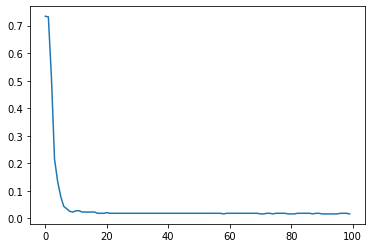

0.008027522935779817


In [66]:
N, D = X_train.shape

nn = ArtificialNeuralNet(input_dim=D, hidden_dim=[5, 5], output_dim=1, gamma0=1e-2, d=1e-1)
nn.fit(X_train, y_train)

plt.plot(nn.loss)
plt.show()

print(get_error(nn.predict(X_train), y_train))